<a href="https://colab.research.google.com/github/Victor-T2001/Term-Project-2021/blob/main/TP21%203.2%20SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import random, numpy
from numpy.random import seed

SEED = 12345

In [9]:
df = pd.read_excel('Data for NN SP500.xlsx')
df.index = pd.to_datetime(df.Date)
df.drop(['Date'], axis='columns', inplace=True)
df.head()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,CCI 1,SO 1,CMO 1,Y
Date,,,,,,,,,,,,,,,,,,,
2000-03-14,-0.017685,0.002604,-0.025322,-0.008207,-0.002317,-0.004169,0.076666,-1,1,-1,-1,-1,-1,0,-1,-1,0,-1,1
2000-03-15,0.024273,0.018614,-0.012162,-0.017685,0.002036,-0.001589,0.190859,1,1,1,1,1,1,0,1,1,0,-1,1
2000-03-16,0.047646,0.040508,0.035022,0.024280,0.043262,0.025910,0.137780,1,1,1,1,1,1,0,1,1,0,1,1
2000-03-17,0.004114,0.049747,0.027720,0.047639,0.012931,0.043939,-0.126290,1,1,1,1,1,1,0,1,1,0,1,0
2000-03-20,-0.005353,0.052767,0.022649,0.004114,-0.004759,-0.003323,-0.289012,1,1,1,1,1,1,0,1,1,0,1,1


In [10]:
X = df.copy()
Y = X.pop('Y')
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.75, random_state=42, shuffle=False)

In [11]:
X_train.tail()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,CCI 1,SO 1,CMO 1
Date,,,,,,,,,,,,,,,,,,
2015-12-07,-0.006990,-0.001605,0.000925,0.019101,-0.001633,0.007576,-0.040592,-1,1,-1,-1,-1,1,1,1,1,1,-1
2015-12-08,-0.006490,-0.018567,-0.003665,-0.008147,-0.007927,-0.006996,0.032086,-1,-1,-1,-1,-1,1,1,1,-1,1,1
2015-12-09,-0.007739,-0.015335,-0.008844,-0.005894,0.003125,-0.007694,0.050719,-1,-1,-1,-1,-1,1,1,1,-1,1,-1
2015-12-10,0.002251,0.001273,-0.018236,-0.006423,-0.006095,0.004488,-0.152808,-1,-1,-1,-1,-1,1,1,1,-1,1,-1
2015-12-11,-0.019423,-0.037921,-0.036872,-0.000322,-0.009857,-0.018023,0.157708,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1


In [12]:
X_valid.head()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,CCI 1,SO 1,CMO 1
Date,,,,,,,,,,,,,,,,,,
2015-12-14,0.004756,-0.026542,-0.027614,-0.016559,-0.011894,-0.007736,0.072396,-1,-1,-1,-1,-1,1,1,1,-1,1,-1
2015-12-15,0.010619,-0.009779,-0.028821,0.006050,0.015300,0.016200,-0.056131,-1,-1,-1,-1,-1,1,1,1,1,1,-1
2015-12-16,0.014515,0.012429,-0.017405,0.010343,0.011125,0.008334,0.064754,1,-1,1,1,1,1,1,1,1,-1,1
2015-12-17,-0.015041,-0.005038,-0.028740,0.013320,-0.000168,-0.000377,-0.066457,-1,-1,-1,-1,-1,1,1,1,1,1,1
2015-12-18,-0.017797,-0.003389,-0.044944,-0.015889,-0.017126,-0.017794,0.544365,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1


In [13]:
y_train

Date
2000-03-14    1
2000-03-15    1
2000-03-16    1
2000-03-17    0
2000-03-20    1
             ..
2015-12-07    0
2015-12-08    0
2015-12-09    1
2015-12-10    0
2015-12-11    1
Name: Y, Length: 3963, dtype: int64

In [14]:
y_valid

Date
2015-12-14    1
2015-12-15    1
2015-12-16    0
2015-12-17    0
2015-12-18    1
             ..
2021-03-10    1
2021-03-11    1
2021-03-12    1
2021-03-15    0
2021-03-16    1
Name: Y, Length: 1322, dtype: int64

In [15]:
input_shape = [X_train.shape[1]]
input_shape

[18]

In [16]:
def neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None):
  from tensorflow.python.framework import ops
  ops.reset_default_graph()

  seed(SEED)
  tensorflow.random.set_seed(SEED)
  random.seed(SEED)
  numpy.random.seed(SEED)

  if dropout_include==False:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dense(nodes_second, activation='relu'),  
          layers.Dense(1, activation='sigmoid')
      ])
  else:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dropout(rate=rate_),
          layers.Dense(nodes_second, activation='relu'),
          layers.Dropout(rate=rate_),    
          layers.Dense(1, activation='sigmoid')
      ])

  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy'])

  early_stopping = keras.callbacks.EarlyStopping(
      patience=4,
      min_delta=0.001,
      restore_best_weights=False,
  )

  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      batch_size=batch,
      epochs=40,
      verbose=0,
      callbacks=[early_stopping]
  )

  print("model "+str(count) + ":"+
        " nodes_first= "+str(nodes_first)+
        ", nodes_second=" + str(nodes_second) +
        ", batch=" + str(batch) +
        ", dropout_include=" + str(dropout_include) +
        ", rate=" + str(rate_) +
        ". Binary accuracy: " + str(history.history['binary_accuracy'][-1]))
  
  return (history.history['binary_accuracy'][-1])

In [ ]:
i = 0
accuracy_list = []
for dropout_include in [True, False]:
  for batch in [64, 128, 256, 512, 1024]:
    for nodes_first in [4, 8, 16, 32]:
      for nodes_second in [4, 8, 16, 32]:
        if dropout_include == True:
          for rate__ in [0.2, 0.3, 0.4, 0.5]:
            acc = neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, i, rate_=rate__)
            i=i+1
            accuracy_list.append(acc)
        else:
          acc = neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, i)
          i=i+1
          accuracy_list.append(acc)

model 0: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.2. Binary accuracy: 0.5145092010498047
model 1: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.3. Binary accuracy: 0.5185465812683105
model 2: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.4. Binary accuracy: 0.5215745568275452
model 3: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.5. Binary accuracy: 0.5246025919914246
model 4: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.2. Binary accuracy: 0.5248548984527588
model 5: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.3. Binary accuracy: 0.5311632752418518
model 6: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.4. Binary accuracy: 0.5286399126052856
model 7: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.5. Binary accuracy: 0.5215745568275452
model 8: nodes_first= 4, nodes_second=16, batch=

In [ ]:
sorted(range(len(accuracy_list)), key=lambda x: accuracy_list[x])[-5:]

[365, 367, 351, 334, 335]

# Top-5 models

model 335: nodes_first= 32, nodes_second=32, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5417612791061401

model 334: nodes_first= 32, nodes_second=16, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.539490282535553

model 351: nodes_first= 32, nodes_second=32, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5392379760742188

model 367: nodes_first= 32, nodes_second=32, batch=256, dropout_include=False, rate=None. Binary accuracy: 0.5384809374809265

model 365: nodes_first= 32, nodes_second=8, batch=256, dropout_include=False, rate=None. Binary accuracy: 0.5382286310195923

In [24]:
def neural_network_analysis(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None):
  from tensorflow.python.framework import ops
  ops.reset_default_graph()

  seed(SEED)
  tensorflow.random.set_seed(SEED)
  random.seed(SEED)
  numpy.random.seed(SEED)

  if dropout_include==False:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dense(nodes_second, activation='relu'),  
          layers.Dense(1, activation='sigmoid')
      ])
  else:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dropout(rate=rate_),
          layers.Dense(nodes_second, activation='relu'),
          layers.Dropout(rate=rate_),    
          layers.Dense(1, activation='sigmoid')
      ])

  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy'])

  early_stopping = keras.callbacks.EarlyStopping(
      patience=4,
      min_delta=0.001,
      restore_best_weights=False,
  )

  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      batch_size=batch,
      epochs=40,
      verbose=0,
      callbacks=[early_stopping]
  )

  print("model "+str(count) + ":"+
        " nodes_first= "+str(nodes_first)+
        ", nodes_second=" + str(nodes_second) +
        ", batch=" + str(batch) +
        ", dropout_include=" + str(dropout_include) +
        ", rate=" + str(rate_) +
        ". Binary accuracy: " + str(history.history['binary_accuracy'][-1]))
  
  history_df = pd.DataFrame(history.history)
  history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy", colormap='bwr')

  history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy", colormap='bwr')

  plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

model 335: nodes_first= 32, nodes_second=32, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5417612791061401


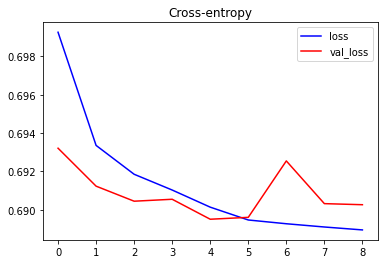

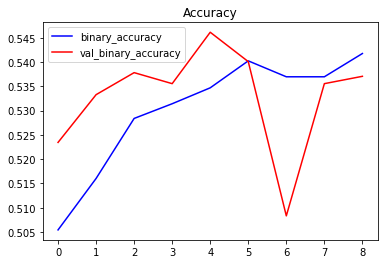

In [25]:
# neural_network_analysis(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None)

neural_network_analysis(32, 32, 64, False, SEED, X_train, y_train, X_valid, y_valid, 335)

model 334: nodes_first= 32, nodes_second=16, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.539490282535553


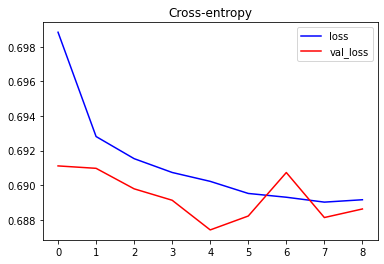

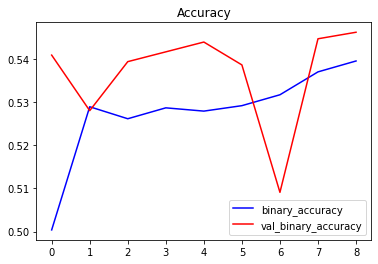

In [26]:
neural_network_analysis(32, 16, 64, False, SEED, X_train, y_train, X_valid, y_valid, 334)


model 351: nodes_first= 32, nodes_second=32, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5392379760742188


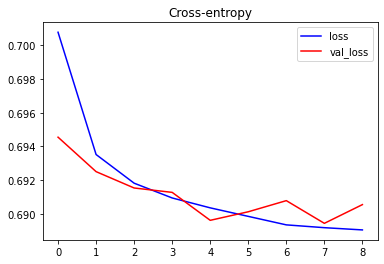

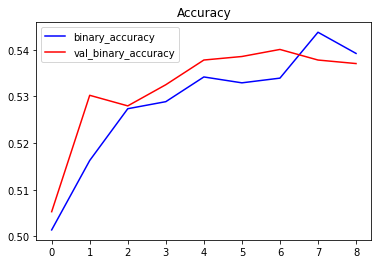

In [27]:
neural_network_analysis(32, 32, 128, False, SEED, X_train, y_train, X_valid, y_valid, 351)